In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/energy-efficiency-data-set/energy_efficiency_data.csv


In [2]:
df = pd.read_csv('../input/energy-efficiency-data-set/energy_efficiency_data.csv')

In [3]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Let´s see if there is null data

<AxesSubplot:>

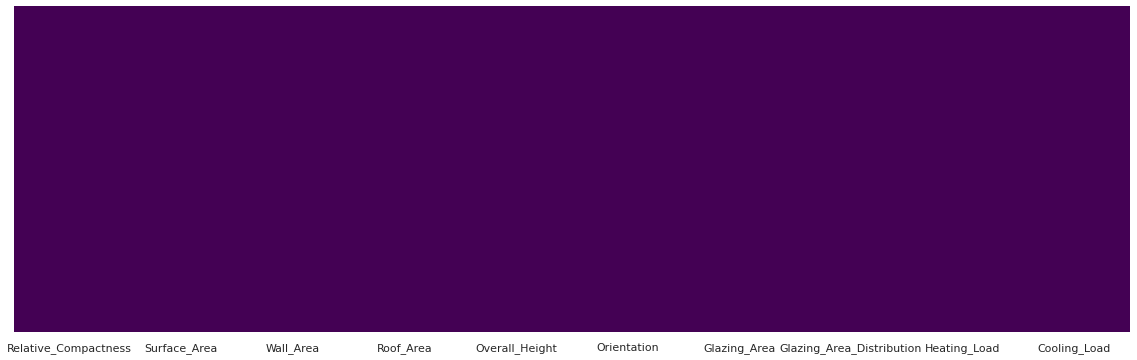

In [5]:
sns.set(rc={'figure.figsize':(20,6)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

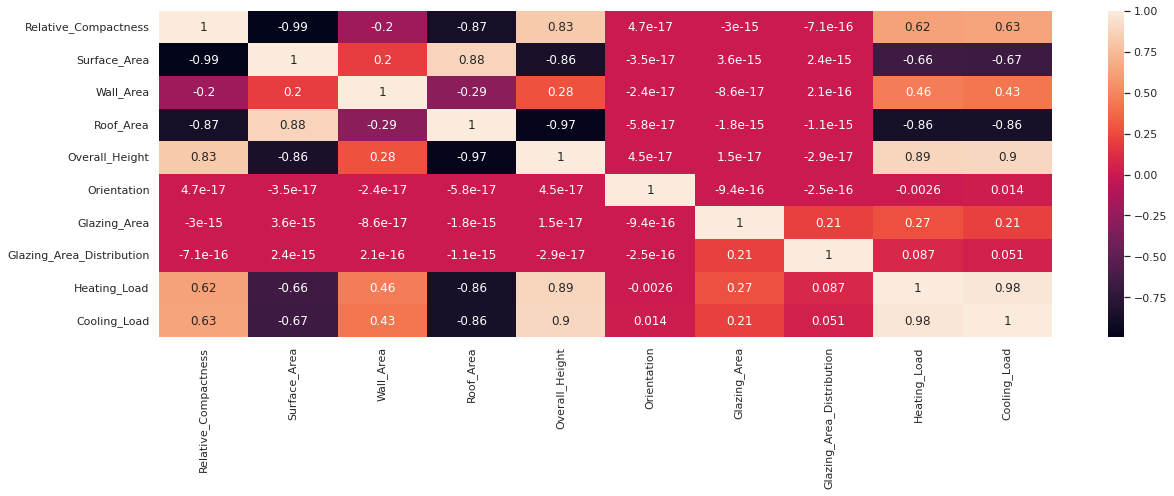

In [6]:
sns.heatmap(df.corr(),annot=True)

Let´s see those aspects who are most related with

In [7]:
df.corr()[(df.corr() > 0.7) | (df.corr() < -0.7)]

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000,-0.991901,NaN,-0.868823,0.827747,NaN,NaN,NaN,NaN,NaN
Surface_Area,-0.991901,1.000000,NaN,0.880720,-0.858148,NaN,NaN,NaN,NaN,NaN
Wall_Area,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roof_Area,-0.868823,0.880720,NaN,1.000000,-0.972512,NaN,NaN,NaN,-0.861828,-0.862547
Overall_Height,0.827747,-0.858148,NaN,-0.972512,1.000000,NaN,NaN,NaN,0.889431,0.895785
Orientation,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Glazing_Area,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Glazing_Area_Distribution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Heating_Load,NaN,NaN,NaN,-0.861828,0.889431,NaN,NaN,NaN,1.000000,0.975862
Cooling_Load,NaN,NaN,NaN,-0.862547,0.895785,NaN,NaN,NaN,0.975862,1.000000


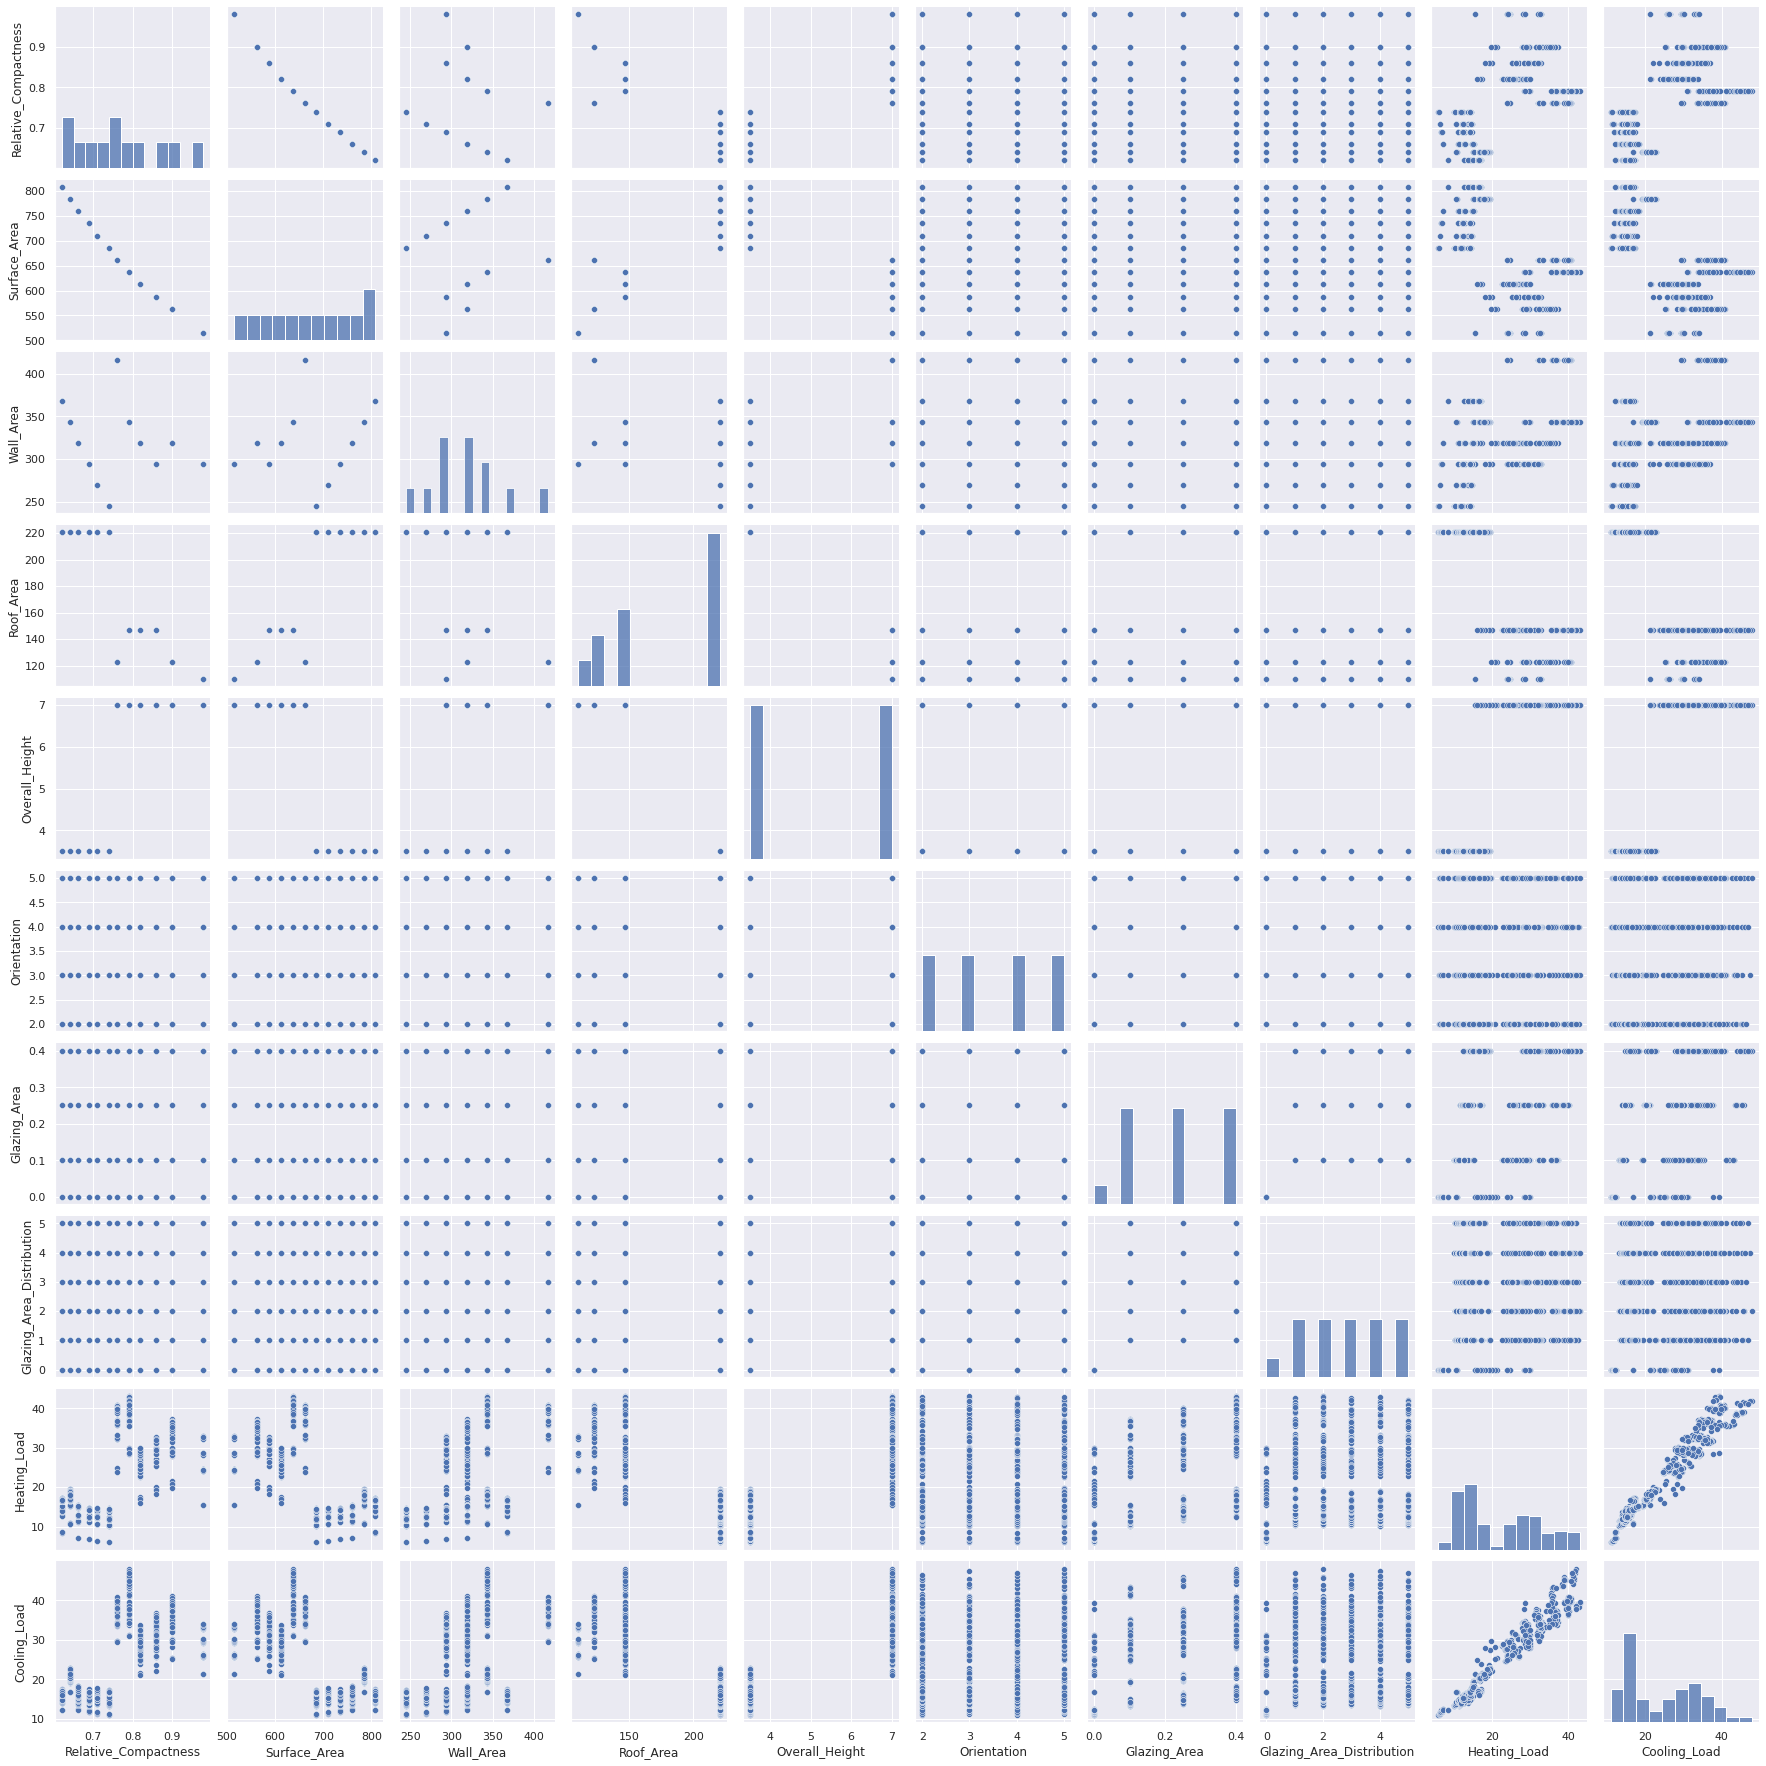

In [8]:
sns.pairplot(df)

# Random Forest Classifier

The first thing it´s to split the dataset in train and test. Then create an instance of Random Forest Classifier and fit the model


# ******** IMPORTANT ********

As I faced the problem of 'continuous-multioutput' error when I tried to predict the outputs, I found out that the solution is to convert the dataset to string in order to fit the model

In [9]:
df = df.astype(str)

In [10]:
x = df.drop(['Heating_Load', 'Cooling_Load'],axis=1)
y = df[['Heating_Load', 'Cooling_Load']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)

In [12]:
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [13]:
predictions = pd.DataFrame(predictions,columns = ['Heating_Load_predicted', 'Cooling_Load_predicted'])
predictions.head()

,Heating_Load_predicted,Cooling_Load_predicted
0,16.44,17.11
1,12.63,14.58
2,10.54,16.8
3,33.13,32.25
4,28.01,32.92


To see the differences between the real data and the predictions, we will calculate the percentage of the difference

In [14]:
## Here I set the same index for each dataframe
predictions = predictions.set_index(y_test.index)
##Converting to numeric
predictions['Heating_Load_predicted'] = pd.to_numeric(predictions['Heating_Load_predicted'])
predictions['Cooling_Load_predicted'] = pd.to_numeric(predictions['Cooling_Load_predicted'])
y_test['Heating_Load'] = pd.to_numeric(y_test['Heating_Load'])
y_test['Cooling_Load'] = pd.to_numeric(y_test['Cooling_Load'])

##Create a DF for the differences
diff = pd.DataFrame()
##Calculate the differences
diff['Heating_Load_diff'] = y_test['Heating_Load'] / predictions['Heating_Load_predicted'] - 1
diff['Cooling_Load_diff'] = y_test['Cooling_Load'] / predictions['Cooling_Load_predicted'] - 1

# Model performance
Now let´s see how the model perform, so that we will create some plots and deep dive into the differences between the real data and the predictions.

<AxesSubplot:ylabel='Heating_Load_predicted'>

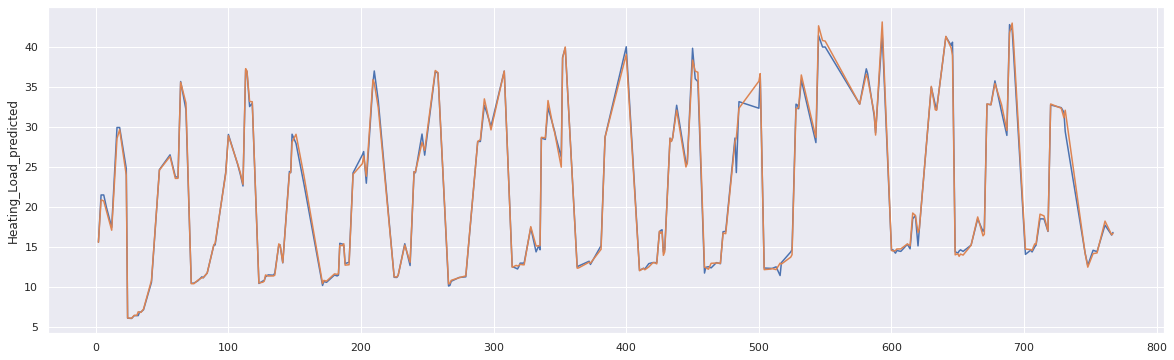

In [15]:
sns.lineplot(data = predictions['Heating_Load_predicted'])
sns.lineplot(data = y_test['Heating_Load'])

<AxesSubplot:ylabel='Cooling_Load_predicted'>

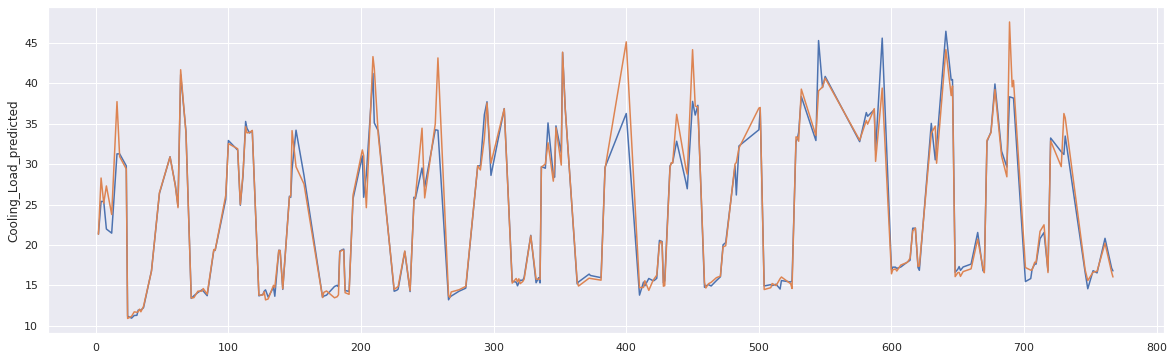

In [16]:
sns.lineplot(data = predictions['Cooling_Load_predicted'])
sns.lineplot(data = y_test['Cooling_Load'])

Despite the line plots shown pretty low differences, it´s always healthy to zoom in and be sure because it seems that the predictions for the Heating Load are better than for the Cooling Load. 

In [17]:
diff.describe()

,Heating_Load_diff,Cooling_Load_diff
count,231.000000,231.000000
mean,0.002148,0.008934
std,0.027950,0.060050
min,-0.047728,-0.141911
25%,-0.012681,-0.017664
50%,-0.000349,-0.000977
75%,0.011887,0.021315
max,0.179308,0.262142


Now we can conclude that the mean of the differences are greater for Cooling Load than for Heating Load and the standar deviation is higher too.

Let´s make some more plots.

<AxesSubplot:>

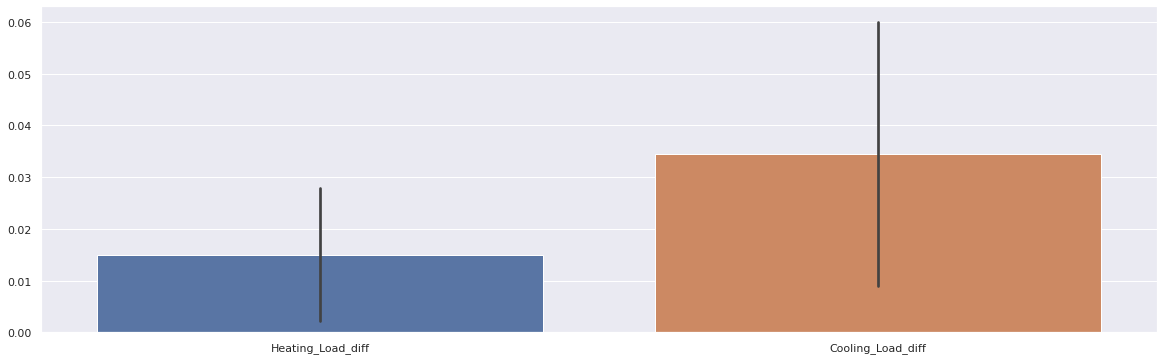

In [18]:
##Let´s plot the mean and the standar deviation
sns.barplot(data = diff.describe().iloc[1:3])

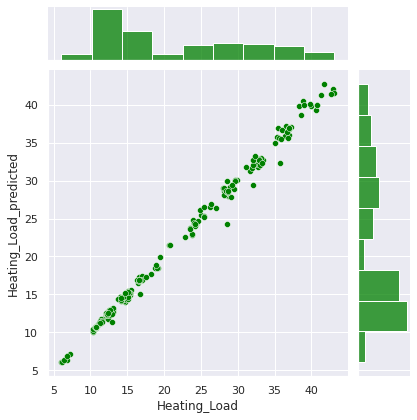

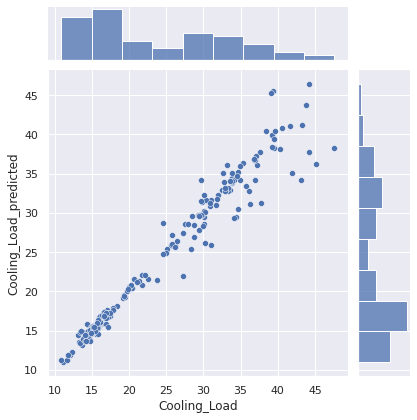

In [19]:
sns.jointplot(x = y_test['Heating_Load'], y = predictions['Heating_Load_predicted'],color = 'green')
sns.jointplot(x = y_test['Cooling_Load'], y = predictions['Cooling_Load_predicted'])

<AxesSubplot:>

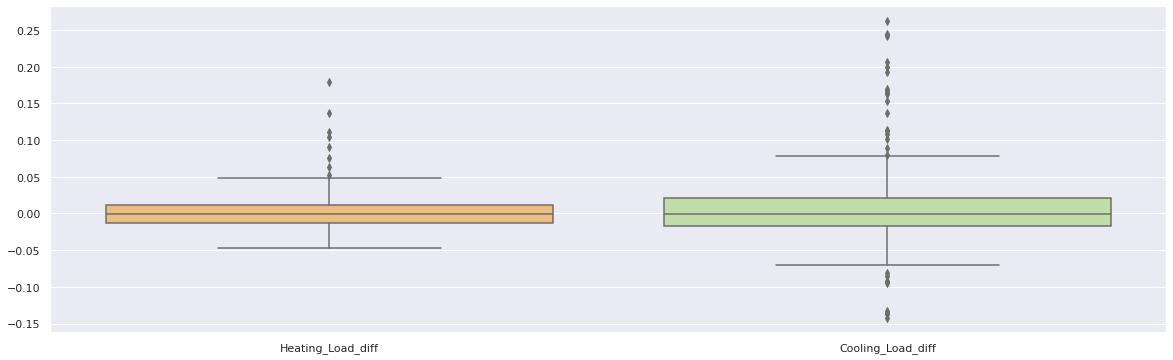

In [20]:
sns.boxplot(data = diff,palette='Spectral')

<AxesSubplot:>

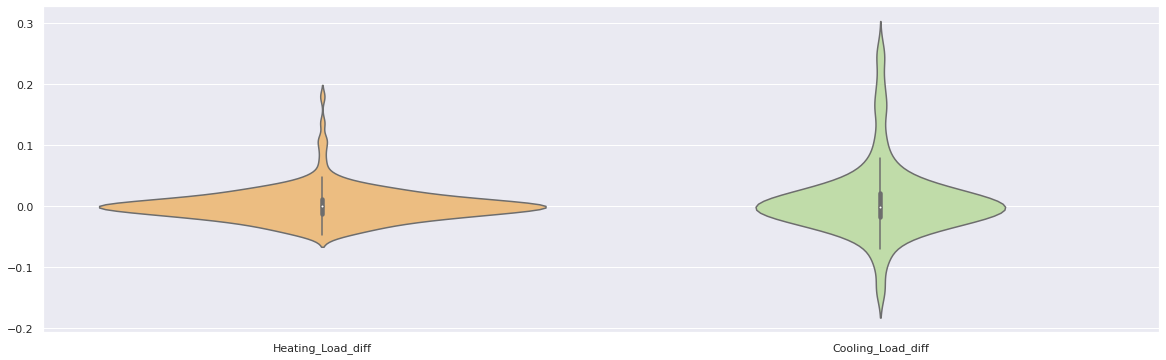

In [21]:
sns.violinplot(data = diff,palette='Spectral')

<AxesSubplot:ylabel='Density'>

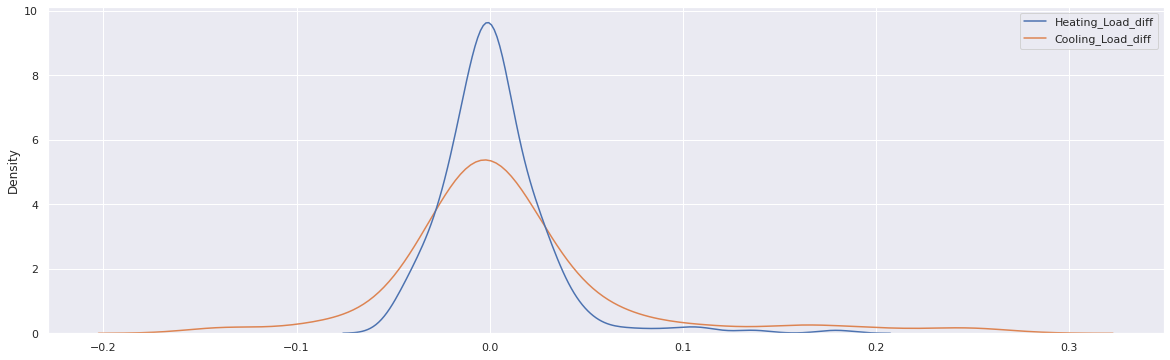

In [22]:
sns.kdeplot(data = diff)